<a href="https://colab.research.google.com/github/SiLiKhon/RICH_GAN_misc/blob/master/RICH_Data_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RICH Data Overview

## Get the data

The training sample is shared [here](https://cernbox.cern.ch/index.php/s/RkZoMRBofrhqzZm).

These are simulated detector responses for 6 particle types (below are per-file links to the same files as above):



*   electrons https://cernbox.cern.ch/index.php/s/q5ZwDYfvOXJmnBR
*   kaons https://cernbox.cern.ch/index.php/s/nfBRDGCagdgor3q
*   muons https://cernbox.cern.ch/index.php/s/jfw0Nhyw8gYNBhk
*   pions https://cernbox.cern.ch/index.php/s/dyZJGMZuVRW0Kgg
*   protons https://cernbox.cern.ch/index.php/s/SQ6G6dmLOLTvMuz
*   ghosts https://cernbox.cern.ch/index.php/s/9Ui4xKerEDdw7Fv (these are 'fake' tracks - i.e. random tracker hits that look like a track from a real particle)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_pion = pd.read_csv('../data/v1_pion_train.csv')
df_kaon = pd.read_csv('../data/v1_kaon_train.csv')
df_electron = pd.read_csv('../data/v1_electron_train.csv')
df_proton = pd.read_csv('../data/v1_proton_train.csv')
df_muon = pd.read_csv('../data/v1_muon_train.csv')
df_ghost = pd.read_csv('../data/v1_ghost_train.csv')

In [3]:
all_dfs = {}
all_dfs['pion'] = df_pion.copy()
all_dfs['kaon'] = df_kaon.copy()
all_dfs['electron'] = df_electron.copy()
all_dfs['proton'] = df_proton.copy()
all_dfs['muon'] = df_muon.copy()
all_dfs['ghost'] = df_ghost.copy()
df_names = all_dfs.keys()
print(df_names)
for name in df_names:
    print(name)

dict_keys(['electron', 'proton', 'muon', 'kaon', 'pion', 'ghost'])
electron
proton
muon
kaon
pion
ghost


In [4]:
print(df_pion.columns)
print(df_kaon.columns)

Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')
Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')


Input variables are:
*   `TrackP` – full momentum of the particle
*   `TrackPt` – length of the momentum projection to the XY plane
*   `TrackEta` – track [pseudorapidity](https://en.wikipedia.org/wiki/Pseudorapidity)
*   `NumLongTracks` – number of reconstructed tracks in current event

Please note that among P, Pt and ETA there are only **two** independant variables. 


The variables to predict are:

*   `RichDLLbt`
*   `RichDLLk`
*   `RichDLLmu`
*   `RichDLLp`
*   `RichDLLe`


There's also one additional variable:

*   `MCParticleType` – particle [PDG code](http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf)




In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
df_pion.describe()

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
count,1000006.000,1000006.000,1000006.000,1000006.000,1000006.000,1000006.000,1000006.000,1000006.000,1000006.000,1000006.000
mean,610.859,11657.752,50.008,0.405,-40.588,-41.348,-33.636,-40.810,-44.644,3.508
std,611.034,15374.533,22.960,211.000,156.393,156.398,156.942,156.394,155.906,0.759
min,5.805,1120.040,1.000,-211.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.539
25%,273.211,3932.927,33.000,-211.000,-26.094,-26.820,-13.092,-26.310,-30.334,2.924
50%,443.466,6965.105,47.000,211.000,-11.370,-11.575,-4.306,-11.450,-15.763,3.506
75%,737.745,13408.570,64.000,211.000,-0.571,-0.848,-0.352,-0.645,-5.094,4.095
max,65425.641,1067608.625,183.000,211.000,51.083,76.814,129.430,51.083,97.278,8.133


In [7]:
df_kaon.describe()

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
count,999993.000,999993.000,999993.000,999993.000,999993.000,999993.000,999993.000,999993.000,999993.000,999993.000
mean,917.170,17207.830,49.570,4.437,-4.132,1.683,-17.208,-4.545,-20.286,3.480
std,870.250,21471.422,23.126,320.969,125.769,126.901,123.420,125.709,123.263,0.773
min,19.675,1143.810,1.000,-321.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.542
25%,406.408,5646.150,32.000,-321.000,1.495,4.762,-3.454,1.085,-8.592,2.874
50%,675.000,10416.780,46.000,321.000,10.576,14.217,-0.926,10.074,-2.711,3.477
75%,1129.237,20396.689,64.000,321.000,20.874,25.463,0.285,20.370,-0.032,4.085
max,80601.172,1063457.375,183.000,321.000,75.218,190.337,96.350,73.100,91.978,5.946


In [8]:
df_electron.describe()

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
count,1000004.000,1000004.000,1000004.000,1000004.000,1000004.000,1000004.000,1000004.000,1000004.000,1000004.000,1000004.000
mean,774.410,12006.706,45.238,-0.033,-69.271,-70.150,-60.696,-69.842,-42.234,3.458
std,1022.024,18809.613,22.536,11.000,244.831,244.747,246.536,244.784,252.584,0.764
min,6.318,1163.420,1.000,-11.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.559
25%,203.142,3426.308,28.000,-11.000,-15.329,-15.705,-2.069,-15.707,1.263,2.865
50%,420.032,6069.970,42.000,-11.000,0.000,0.000,0.942,0.000,13.302,3.464
75%,936.594,12578.743,59.000,11.000,4.740,4.360,7.004,4.620,34.068,4.055
max,40210.055,1236918.250,194.000,11.000,53.360,104.949,93.838,51.369,220.983,6.961


In [9]:
df_proton.describe()

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
count,999994.000,999994.000,999994.000,999994.000,999994.000,999994.000,999994.000,999994.000,999994.000,999994.000
mean,951.633,17670.202,50.566,81.128,-0.556,-3.917,-16.145,1.405,-19.282,3.426
std,811.404,22202.178,23.011,2210.513,121.915,121.295,119.364,122.295,119.240,0.778
min,8.960,1164.830,1.000,-2212.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.541
25%,434.631,5529.433,34.000,-2212.000,3.522,1.779,-3.392,4.820,-8.775,2.805
50%,730.671,10457.040,48.000,2212.000,12.889,9.151,-0.708,14.443,-2.299,3.418
75%,1217.481,21094.359,65.000,2212.000,23.332,18.177,0.350,24.922,0.191,4.030
max,37309.594,1347936.625,194.000,2212.000,79.556,91.176,58.315,151.154,122.141,7.627


In [10]:
df_muon.describe()

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
count,1000001.000,1000001.000,1000001.000,1000001.000,1000001.000,1000001.000,1000001.000,1000001.000,1000001.000,1000001.000
mean,1977.057,30194.521,41.559,0.005,-40.284,-39.560,-9.067,-42.075,-19.117,3.233
std,3133.910,45952.457,21.798,13.000,117.335,117.966,118.211,117.723,116.849,0.754
min,8.311,1109.380,1.000,-13.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.543
25%,605.893,6458.260,25.000,-13.000,-45.639,-45.002,-0.273,-48.647,-9.534,2.628
50%,1391.642,15442.470,38.000,13.000,-21.981,-17.229,0.507,-22.000,-1.107,3.185
75%,2587.355,35885.129,54.000,13.000,-2.017,-0.897,5.521,-2.410,0.600,3.797
max,578204.750,4750951.000,182.000,13.000,61.730,124.330,155.860,61.730,93.894,7.282


In [11]:
df_ghost.describe()

,TrackPt,TrackP,NumLongTracks,MCParticleType,RichDLLbt,RichDLLk,RichDLLmu,RichDLLp,RichDLLe,TrackEta
count,999995.000,999995.000,999995.000,999995.000,999995.000,999995.000,999995.000,999995.000,999995.000,999995.000
mean,385.563,8576.308,58.258,0.000,-156.869,-157.162,-157.718,-156.940,-159.754,3.868
std,2120.557,30754.792,24.609,0.000,362.826,362.704,362.358,362.797,361.703,0.757
min,0.451,1118.740,1.000,0.000,-999.000,-999.000,-999.000,-999.000,-999.000,1.539
25%,113.098,2821.880,40.000,0.000,-12.306,-12.381,-8.406,-12.331,-20.574,3.374
50%,205.899,4601.630,55.000,0.000,0.000,0.000,-1.542,0.000,-5.545,3.930
75%,404.584,8632.430,74.000,0.000,2.399,2.161,0.619,2.334,1.464,4.411
max,633395.438,4969893.000,194.000,0.000,70.041,128.702,119.712,115.482,179.980,10.430


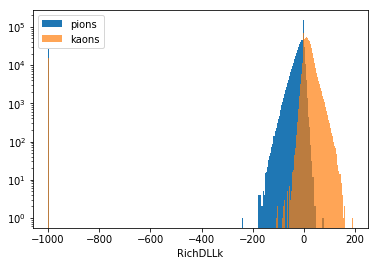

In [12]:
bins = np.linspace(
        start=min(df_pion.RichDLLk.min(), df_kaon.RichDLLk.min(),
                  df_electron.RichDLLk.min(), df_proton.RichDLLk.mean(), df_muon.RichDLLk.mean()
                 ), 
        stop =max(df_pion.RichDLLk.max(), df_kaon.RichDLLk.max(),
                  df_electron.RichDLLk.max(), df_proton.RichDLLk.max(), df_muon.RichDLLk.max()
                 ), 
        num=601
    )

plt.hist(df_pion.RichDLLk, bins=bins, label='pions')
plt.hist(df_kaon.RichDLLk, bins=bins, label='kaons', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.xlabel('RichDLLk');

One can see there's a peak of outliers at the left handside of the plot. Let's not bother about it so far.

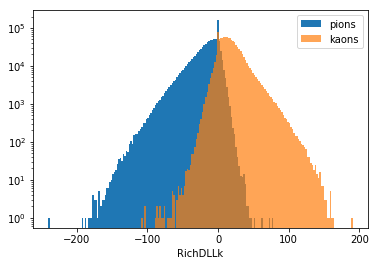

In [13]:
not_outlier_pion = df_pion.RichDLLk > -500
not_outlier_kaon = df_kaon.RichDLLk > -500

bins = np.linspace(
        start=min(df_pion.RichDLLk[not_outlier_pion].min(), df_kaon.RichDLLk[not_outlier_kaon].min()), 
        stop =max(df_pion.RichDLLk[not_outlier_pion].max(), df_kaon.RichDLLk[not_outlier_kaon].max()), 
        num=201
    )

plt.hist(df_pion.RichDLLk, bins=bins, label='pions')
plt.hist(df_kaon.RichDLLk, bins=bins, label='kaons', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.xlabel('RichDLLk');

In [14]:
import matplotlib.colors as colors

'''
fig, ((ax_pion, ax_kaon), (ax_electron, ax_proton), (ax_muon, ax_ghost)) = plt.subplots(
                                    nrows=3,
                                    ncols=2,
                                    figsize=(15, 18)
                                )

_, bins_x, bins_y, img_pion = \
    ax_pion.hist2d(
            x=df_pion.TrackEta,
            y=df_pion.RichDLLk,
            bins=(100, bins),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_kaon = \
    ax_kaon.hist2d(
            x=df_kaon.TrackEta,
            y=df_kaon.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_electron = \
    ax_electron.hist2d(
            x=df_electron.TrackEta,
            y=df_electron.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_proton = \
    ax_proton.hist2d(
            x=df_proton.TrackEta,
            y=df_proton.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_muon = \
    ax_muon.hist2d(
            x=df_muon.TrackEta,
            y=df_muon.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_ghost = \
    ax_ghost.hist2d(
            x=df_ghost.TrackEta,
            y=df_ghost.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )

plt.colorbar(img_pion, ax=ax_pion)
ax_pion.set_xlabel('Eta')
ax_pion.set_ylabel('RichDLLk')
ax_pion.set_title('Pions')
plt.colorbar(img_kaon, ax=ax_kaon)
ax_kaon.set_xlabel('Eta')
ax_kaon.set_ylabel('RichDLLk')
ax_kaon.set_title('Kaons')
plt.colorbar(img_electron, ax=ax_electron)
ax_electron.set_xlabel('Eta')
ax_electron.set_ylabel('RichDLLk')
ax_electron.set_title('Electrons')
plt.colorbar(img_proton, ax=ax_proton)
ax_proton.set_xlabel('Eta')
ax_proton.set_ylabel('RichDLLk')
ax_proton.set_title('Protons')
plt.colorbar(img_muon, ax=ax_muon)
ax_muon.set_xlabel('Eta')
ax_muon.set_ylabel('RichDLLk')
ax_muon.set_title('Muons')
plt.colorbar(img_ghost, ax=ax_ghost)
ax_ghost.set_xlabel('Eta')
ax_ghost.set_ylabel('RichDLLk')
ax_ghost.set_title('Ghosts')

fig.tight_layout();
'''

"\nfig, ((ax_pion, ax_kaon), (ax_electron, ax_proton), (ax_muon, ax_ghost)) = plt.subplots(\n                                    nrows=3,\n                                    ncols=2,\n                                    figsize=(15, 18)\n                                )\n\n_, bins_x, bins_y, img_pion =     ax_pion.hist2d(\n            x=df_pion.TrackEta,\n            y=df_pion.RichDLLk,\n            bins=(100, bins),\n            cmap='seismic',\n            norm=colors.LogNorm()\n        )\n_, _, _, img_kaon =     ax_kaon.hist2d(\n            x=df_kaon.TrackEta,\n            y=df_kaon.RichDLLk,\n            bins=(bins_x, bins_y),\n            cmap='seismic',\n            norm=colors.LogNorm()\n        )\n_, _, _, img_electron =     ax_electron.hist2d(\n            x=df_electron.TrackEta,\n            y=df_electron.RichDLLk,\n            bins=(bins_x, bins_y),\n            cmap='seismic',\n            norm=colors.LogNorm()\n        )\n_, _, _, img_proton =     ax_proton.hist2d(\n    

## Look at the datasets

In [15]:
given_var = ['TrackPt', 'TrackP', 'TrackEta', 'NumLongTracks']
x_bins = np.zeros((len(given_var), 201))

for i in range(len(given_var)):
    col = given_var[i]
    x_bins[i] = np.linspace(
        start=min(df_pion[col].min(), df_kaon[col].min(),
                  df_electron[col].min(), df_proton[col].min(),
                  df_muon[col].min(), df_ghost[col].min()
                 ), 
        stop =max(df_pion[col].max(), df_kaon[col].max(), df_electron[col].max(),
                  df_proton[col].max(), df_muon[col].max(), df_ghost[col].max()
                 ), 
        num=201
    )


In [16]:
pred_var = ['RichDLLbt', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe']
y_bins = np.zeros((len(pred_var), 201))

col = 'RichDLLk'
non_outlier_pion = df_pion[col] > -500
non_outlier_kaon = df_kaon[col] > -500
non_outlier_electron = df_electron[col] > -500
non_outlier_proton = df_proton[col] > -500
non_outlier_muon = df_muon[col] > -500
non_outlier_ghost = df_ghost[col] > -500

for i in range(len(pred_var)):
    col = pred_var[i]
    y_bins[i] = np.linspace(
        start=min(df_pion[col][non_outlier_pion].min(), df_kaon[col][non_outlier_kaon].min(),
                  df_electron[col][non_outlier_electron].min(), df_proton[col][non_outlier_proton].min(),
                  df_muon[col][non_outlier_muon].min(), df_ghost[col][non_outlier_ghost].min()
                 ), 
        stop =max(df_pion[col].max(), df_kaon[col].max(), df_electron[col].max(),
                  df_proton[col].max(), df_muon[col].max(), df_ghost[col].max()
                 ), 
        num=201
    )

In [17]:
def plot_df(df, bins, label, cols):
    fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(20, 4))
    for i in range(len(cols)):
        axes[i].hist(df[cols[i]], bins=bins[i], label=label)
        axes[i].set_yscale('log')
        axes[i].set_xlabel(cols[i])
        axes[i].set_title(label)
        axes[i].legend()
    fig.show()

In [18]:
'''
plot_df(df_pion, x_bins, 'Pions', given_var)
plot_df(df_kaon, x_bins, 'Kaons', given_var)
plot_df(df_electron, x_bins, 'Electrons', given_var)
plot_df(df_proton, x_bins, 'Protons', given_var)
plot_df(df_muon, x_bins, 'Muons', given_var)
plot_df(df_ghost, x_bins, 'Ghosts', given_var)
'''

"\nplot_df(df_pion, x_bins, 'Pions', given_var)\nplot_df(df_kaon, x_bins, 'Kaons', given_var)\nplot_df(df_electron, x_bins, 'Electrons', given_var)\nplot_df(df_proton, x_bins, 'Protons', given_var)\nplot_df(df_muon, x_bins, 'Muons', given_var)\nplot_df(df_ghost, x_bins, 'Ghosts', given_var)\n"

In [19]:
'''
plot_df(df_pion, y_bins, 'Pions', pred_var)
plot_df(df_kaon, y_bins, 'Kaons', pred_var)
plot_df(df_electron, y_bins, 'Electrons', pred_var)
plot_df(df_proton, y_bins, 'Protons', pred_var)
plot_df(df_muon, y_bins, 'Muons', pred_var)
plot_df(df_ghost, y_bins, 'Ghosts', pred_var)
'''

"\nplot_df(df_pion, y_bins, 'Pions', pred_var)\nplot_df(df_kaon, y_bins, 'Kaons', pred_var)\nplot_df(df_electron, y_bins, 'Electrons', pred_var)\nplot_df(df_proton, y_bins, 'Protons', pred_var)\nplot_df(df_muon, y_bins, 'Muons', pred_var)\nplot_df(df_ghost, y_bins, 'Ghosts', pred_var)\n"

# Quite a simple model

In [20]:
def make_bins(X, col, n_bins=5):
    return np.quantile(X[col], np.linspace(1./n_bins, 1. - 1./n_bins, n_bins-1))

In [21]:
arr = np.linspace(1, 10, 101)
bins = np.quantile(arr, [0.25, 0.5, 0.75])
left_masks = arr[:, None] <= bins
right_masks = arr[:, None] > bins
masks = np.zeros((arr.size,bins.size+1),dtype=bool)
masks [:,0] = left_masks[:,0]
for i in range(bins.size - 1):
    masks[:,i+1] = (left_masks[:,i+1] & right_masks[:,i])
masks[:,-1] = right_masks[:,-1]

In [95]:
x_cols = ['TrackP', 'TrackEta', 'NumLongTracks']                       # по n_bins в каждом параметре
y_cols = ['RichDLLbt', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe']

In [96]:
class Model:
    def train(self, X, Y, n_bins=5):
        self.means = {}
        self.stds = {}
        for col in Y.columns:
            self.means[col] = np.zeros((n_bins, n_bins, n_bins))
            self.stds[col] = np.zeros((n_bins, n_bins, n_bins))
        self.bins = {}
        self.masks = {}
        for col in X.columns:
            self.bins[col] = np.quantile(X[col], np.linspace(1./n_bins, 1. - 1./n_bins, n_bins-1))
            left_masks = X[col][:, None] <= self.bins[col]
            right_masks = X[col][:, None] > self.bins[col]
            self.masks[col] = np.zeros((X[col].size, n_bins), dtype=bool)
            self.masks[col][:, 0] = left_masks[:, 0]
            for i in range(n_bins - 2):
                self.masks[col][:, i + 1] = (left_masks[:, i + 1] & right_masks[:, i])
            self.masks[col][:, -1] = right_masks[:, -1]
        
        for i in range(n_bins):
            for j in range(n_bins):
                for k in range(n_bins):
                    mask = (self.masks['TrackP'][:,i] &
                        self.masks['TrackEta'][:,j] &
                        self.masks['NumLongTracks'][:,k])
                    for col in Y.columns:
                        self.means[col][i,j,k] = np.mean(Y[col][mask])
                        self.stds [col][i,j,k] = np.std (Y[col][mask])
        

    def predict(self, X):
        prediction = pd.DataFrame()
        count = np.zeros((self.means['RichDLLk'].shape), dtype=int)
        pred_masks = {}
        n_bins = count.shape[0]
        
        for col in X.columns:
            left_masks = X[col][:, None] <= self.bins[col]
            right_masks = X[col][:, None] > self.bins[col]
            pred_masks[col] = np.zeros((X[col].size, n_bins), dtype=bool)
            pred_masks[col][:, 0] = left_masks[:, 0]
            for i in range(n_bins - 2):
                pred_masks[col][:, i + 1] = (left_masks[:, i + 1] & right_masks[:, i])
            pred_masks[col][:, -1] = right_masks[:, -1]
        
        for i in range(n_bins):
            for j in range(n_bins):
                for k in range(n_bins):
                    count[i,j,k] = np.count_nonzero(
                        pred_masks['TrackP'][:,i] &
                        pred_masks['TrackEta'][:,j] &
                        pred_masks['NumLongTracks'][:,k])
        
        
        for col in self.means.keys():
            gaussian = np.array([])
            for i in range(n_bins):
                for j in range(n_bins):
                    for k in range(n_bins):
                        local = np.random.normal(loc=self.means[col][i,j,k],
                                                 scale=self.stds[col][i,j,k],
                                                 size=count[i,j,k])
                        gaussian = np.append(gaussian, local)
                        
            prediction[col] = gaussian
        return prediction

In [23]:
from sklearn.model_selection import KFold
from scipy.stats import ks_2samp

In [24]:
def score_func(sample1, sample2, n_slices=100):
    score = 0
    #cols = x_cols + y_cols
    cols = sample1.columns
    w_normal = np.random.normal(size=(n_slices, len(cols)))
    reference = sample1.copy()[cols].values
    prediction = sample2.copy()[cols].values
    for k in range(n_slices):
        score = max(score,
                    ks_2samp(
                        np.sum(w_normal[k] * reference, axis=1),
                        np.sum(w_normal[k] * prediction, axis=1)
                    )[0]
                   )
    return score

In [25]:
def train_df(df, include_outliers=True, n_bins=5):
    kf = KFold(n_splits=5)

    model_scores = []
    best_scores  = []

    for train_index, test_index in kf.split(df[x_cols]):
        X_train = df[x_cols].iloc[train_index]
        Y_train = df[y_cols].iloc[train_index]
        X_test  = df[x_cols].iloc[test_index ]
        Y_test  = df[y_cols].iloc[test_index ]
  
        model = Model()
        model.train(X_train.copy(), Y_train.copy(), n_bins)
        Y_pred = model.predict(X_test.copy())
  
        model_scores.append(score_func(Y_test, Y_pred))
        best_scores.append(score_func(Y_test, Y_train))
    
    return Y_test, Y_pred, model_scores, best_scores

In [26]:
def visualise_df(Y_test, Y_pred, name):
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 20))
    i = 0
    for col in Y_pred.columns:
        _, bins, _ = axes[i].hist(Y_test[col], bins=100 , label='test'      )
        _, _   , _ = axes[i].hist(Y_pred[col], bins=bins, label='prediction', alpha=0.7)
        axes[i].legend()
        axes[i].set_xlabel("%s: %s" % (name, col))
        i += 1
    fig.show();

In [114]:
def visualise_4_dfs(Y_test_1, Y_pred_1, Y_test_2, Y_pred_2, Y_test_3, Y_pred_3, Y_test_4, Y_pred_4,
                    name, name_1, name_2, name_3, name_4,
                    model_scores, model_scores_10, model_scores_15, model_scores_20):
    print("Mean %s model scores:" % name)
    print("5 bins: %g" % np.mean(model_scores[name]))
    print("10 bins: %g" % np.mean(model_scores_10[name]))
    print("15 bins: %g" % np.mean(model_scores_15[name]))
    print("20 bins: %g" % np.mean(model_scores_20[name]))
    
    fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(30, 20))
    i = 0
    for col in Y_pred_1.columns:
        _, bins, _ = axes[i,0].hist(Y_test_1[col], bins=100 , label='test'      )
        _, _   , _ = axes[i,0].hist(Y_pred_1[col], bins=bins, label='prediction', alpha=0.7)
        axes[i,0].legend()
        axes[i,0].set_xlabel("%s: %s" % (name_1, col))
        axes[i,0].set_xlim(left=-200)

        _, bins, _ = axes[i,1].hist(Y_test_2[col], bins=100 , label='test'      )
        _, _   , _ = axes[i,1].hist(Y_pred_2[col], bins=bins, label='prediction', alpha=0.7)
        axes[i,1].legend()
        axes[i,1].set_xlabel("%s: %s" % (name_2, col))
        axes[i,1].set_xlim(left=-200)
   
        _, bins, _ = axes[i,2].hist(Y_test_3[col], bins=100 , label='test'      )
        _, _   , _ = axes[i,2].hist(Y_pred_3[col], bins=bins, label='prediction', alpha=0.7)
        axes[i,2].legend()
        axes[i,2].set_xlabel("%s: %s" % (name_3, col))
        axes[i,2].set_xlim(left=-200)

        _, bins, _ = axes[i,3].hist(Y_test_4[col], bins=100 , label='test'      )
        _, _   , _ = axes[i,3].hist(Y_pred_4[col], bins=bins, label='prediction', alpha=0.7)
        axes[i,3].legend()
        axes[i,3].set_xlabel("%s: %s" % (name_4, col))
        axes[i,3].set_xlim(left=-200)
        
        i += 1

    fig.show();

In [102]:
def df_scores(model_scores, best_scores):
    m = 0.
    for key in model_scores:
        m += np.mean(model_scores[key])
    print("MODEL SCORES", m / len(model_scores.keys()))
    for key in model_scores:
        print(key, np.mean(model_scores[key]))
        print(model_scores[key])
    
    '''
    print("\n\n\nBEST SCORES")
    for key in best_scores:
        print(key, np.mean(best_scores[key]))
        print(best_scores[key])
    '''
    
    '''
    low, high = 1., 0.
    for name in df_names:
        low = min(low, min(model_scores[name]), min(best_scores[name]))
        high = max(high, max(model_scores[name]), max(best_scores[name]))
    bins = np.linspace(start = low - 0.1, stop = high + 0.1, num=201)
    
    fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(8, 30))
    i = 0
    for name in df_names:
        axes[i].hist(model_scores[name], bins=bins, label='model')
        axes[i].hist(best_scores[name] , bins=bins, label='best possible', alpha=0.6)
        axes[i].legend()
        axes[i].set_xlabel('KS Scores of %s' % name)
        i += 1
    fig.show();
    '''

In [40]:
%%time

Y_test = {}
Y_pred = {}
model_scores = {}
best_scores = {}
ij = 0
for name in df_names:
    df = all_dfs[name].copy()
    Y_test[name], Y_pred[name], model_scores[name], best_scores[name] = train_df(df)
    ij += 1
    print(ij, name)

1 electron
2 proton
3 muon
4 kaon
5 pion
6 ghost
CPU times: user 13min 12s, sys: 844 ms, total: 13min 13s
Wall time: 13min 13s


In [103]:
print("n_bins = 5")
df_scores(model_scores, best_scores)

n_bins = 5
MODEL SCORES 0.2829867240646784
electron 0.2442190564597177
[0.25175874120629405, 0.20657396713016435, 0.24632876835615822, 0.23887880560597197, 0.277555]
pion 0.2984671975671131
[0.3100968990310097, 0.27620861895690524, 0.29729851350743247, 0.29307353463232677, 0.3156584217078915]
muon 0.2554927564412178
[0.24355878220608898, 0.247205, 0.23653500000000002, 0.285575, 0.26459]
kaon 0.2901100289909294
[0.3060515302576513, 0.24523122615613074, 0.32082660413302067, 0.3126631266312664, 0.2657776577765778]
proton 0.2880586970660531
[0.2790163950819754, 0.2975514877574388, 0.28318641593207966, 0.3237666188330941, 0.25677256772567725]
ghost 0.3215726078630393
[0.3457867289336447, 0.3446567232836164, 0.33148165740828706, 0.2784363921819609, 0.3075015375076875]


In [42]:
%%time

Y_test_10 = {}
Y_pred_10 = {}
model_scores_10 = {}
best_scores_10 = {}
ij = 0
for name in df_names:
    df = all_dfs[name].copy()
    Y_test_10[name], Y_pred_10[name], model_scores_10[name], best_scores_10[name] = train_df(df, n_bins=10)
    ij += 1
    print(ij, name)

1 electron
2 proton
3 muon
4 kaon
5 pion
6 ghost
CPU times: user 17min 39s, sys: 1.61 s, total: 17min 41s
Wall time: 17min 41s


In [104]:
print("n_bins = 10")
df_scores(model_scores_10, best_scores_10)

n_bins = 10
MODEL SCORES 0.24484800596545855
electron 0.1924402036389818
[0.20412397938010307, 0.20088899555502227, 0.1964740176299119, 0.19487402562987177, 0.16584]
pion 0.2725033540260645
[0.28345716542834576, 0.3102634486827567, 0.28550857245713773, 0.24490877545612272, 0.23837880810595946]
muon 0.2238027724811376
[0.22751886240568797, 0.225395, 0.21542499999999998, 0.23694499999999996, 0.21372999999999998]
kaon 0.25957585567985636
[0.2980114900574503, 0.23493617468087336, 0.20713103565517832, 0.2828878288782888, 0.27491274912749125]
proton 0.24448746857480427
[0.2220311101555508, 0.21082105410527052, 0.28427142135710676, 0.2591762958814795, 0.2461374613746138]
ghost 0.27627838139190697
[0.2760363801819009, 0.29333146665733323, 0.2726663633318167, 0.24621623108115542, 0.2931414657073286]


In [28]:
%%time

Y_test_15 = {}
Y_pred_15 = {}
model_scores_15 = {}
best_scores_15 = {}
ij = 0
for name in df_names:
    df = all_dfs[name].copy()
    Y_test_15[name], Y_pred_15[name], model_scores_15[name], best_scores_15[name] = train_df(df, n_bins=15)
    ij += 1
    print(ij, name)

1 electron
2 proton
3 muon
4 kaon
5 pion
6 ghost
CPU times: user 30min 49s, sys: 1.08 s, total: 30min 50s
Wall time: 30min 50s


In [105]:
print("n_bins = 15")
df_scores(model_scores_15, best_scores_15)

n_bins = 15
MODEL SCORES 0.2460225168436463
electron 0.1849102753036235
[0.1965840170799146, 0.17842910785446064, 0.16129919350403255, 0.1883840580797097, 0.199855]
pion 0.27929434567585015
[0.25785242147578524, 0.30745346273268637, 0.23783381083094585, 0.3201533992330039, 0.2731786341068294]
muon 0.2274807787361063
[0.22126389368053162, 0.21901000000000004, 0.21459499999999998, 0.2147199999999999, 0.267815]
kaon 0.2569178162793983
[0.2560612803064015, 0.20941604708023542, 0.2874214371071856, 0.2585025850258502, 0.2731877318773188]
proton 0.2610355525852371
[0.2908014540072701, 0.23251116255581283, 0.2304411522057611, 0.3040165200826005, 0.24740747407474079]
ghost 0.2664963324816624
[0.25128125640628207, 0.273761368806844, 0.2879264396321982, 0.2705063525317626, 0.24900624503122518]


In [36]:
%%time

Y_test_20 = {}
Y_pred_20 = {}
model_scores_20 = {}
best_scores_20 = {}
ij = 0
for name in df_names:
    df = all_dfs[name].copy()
    Y_test_20[name], Y_pred_20[name], model_scores_20[name], best_scores_20[name] = train_df(df, n_bins=20)
    ij += 1
    print(ij, name)

1 electron
2 proton
3 muon
4 kaon
5 pion
6 ghost
CPU times: user 57min 32s, sys: 1.55 s, total: 57min 33s
Wall time: 57min 33s


In [106]:
print("n_bins = 20")
df_scores(model_scores_20, best_scores_20)

n_bins = 20
MODEL SCORES 0.23548329485066036
electron 0.20759020590897048
[0.2290238548807256, 0.1869240653796732, 0.21872890635546827, 0.1594142029289854, 0.24386]
pion 0.25425845214050496
[0.27656723432765673, 0.26127369363153186, 0.25871870640646794, 0.230718846405768, 0.24401377993110035]
muon 0.2194557799711002
[0.22002889985550078, 0.18173000000000003, 0.19388499999999997, 0.236625, 0.2650100000000001]
kaon 0.23667861481738833
[0.2707013535067675, 0.2340961704808524, 0.24717123585617928, 0.20944709447094473, 0.22197721977219775]
proton 0.22730437820430788
[0.28603643018215086, 0.24494122470612353, 0.20680603403017017, 0.15705578527892639, 0.24168241682416824]
ghost 0.26761233806169027
[0.29227146135730675, 0.2801714008570043, 0.3013915069575347, 0.22555612778063894, 0.23867119335596676]


На следующих графиках установлен xlim(left=-200).

Mean muon model scores:
5 bins: 0.255493
10 bins: 0.223803
15 bins: 0.227481
20 bins: 0.219456


/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


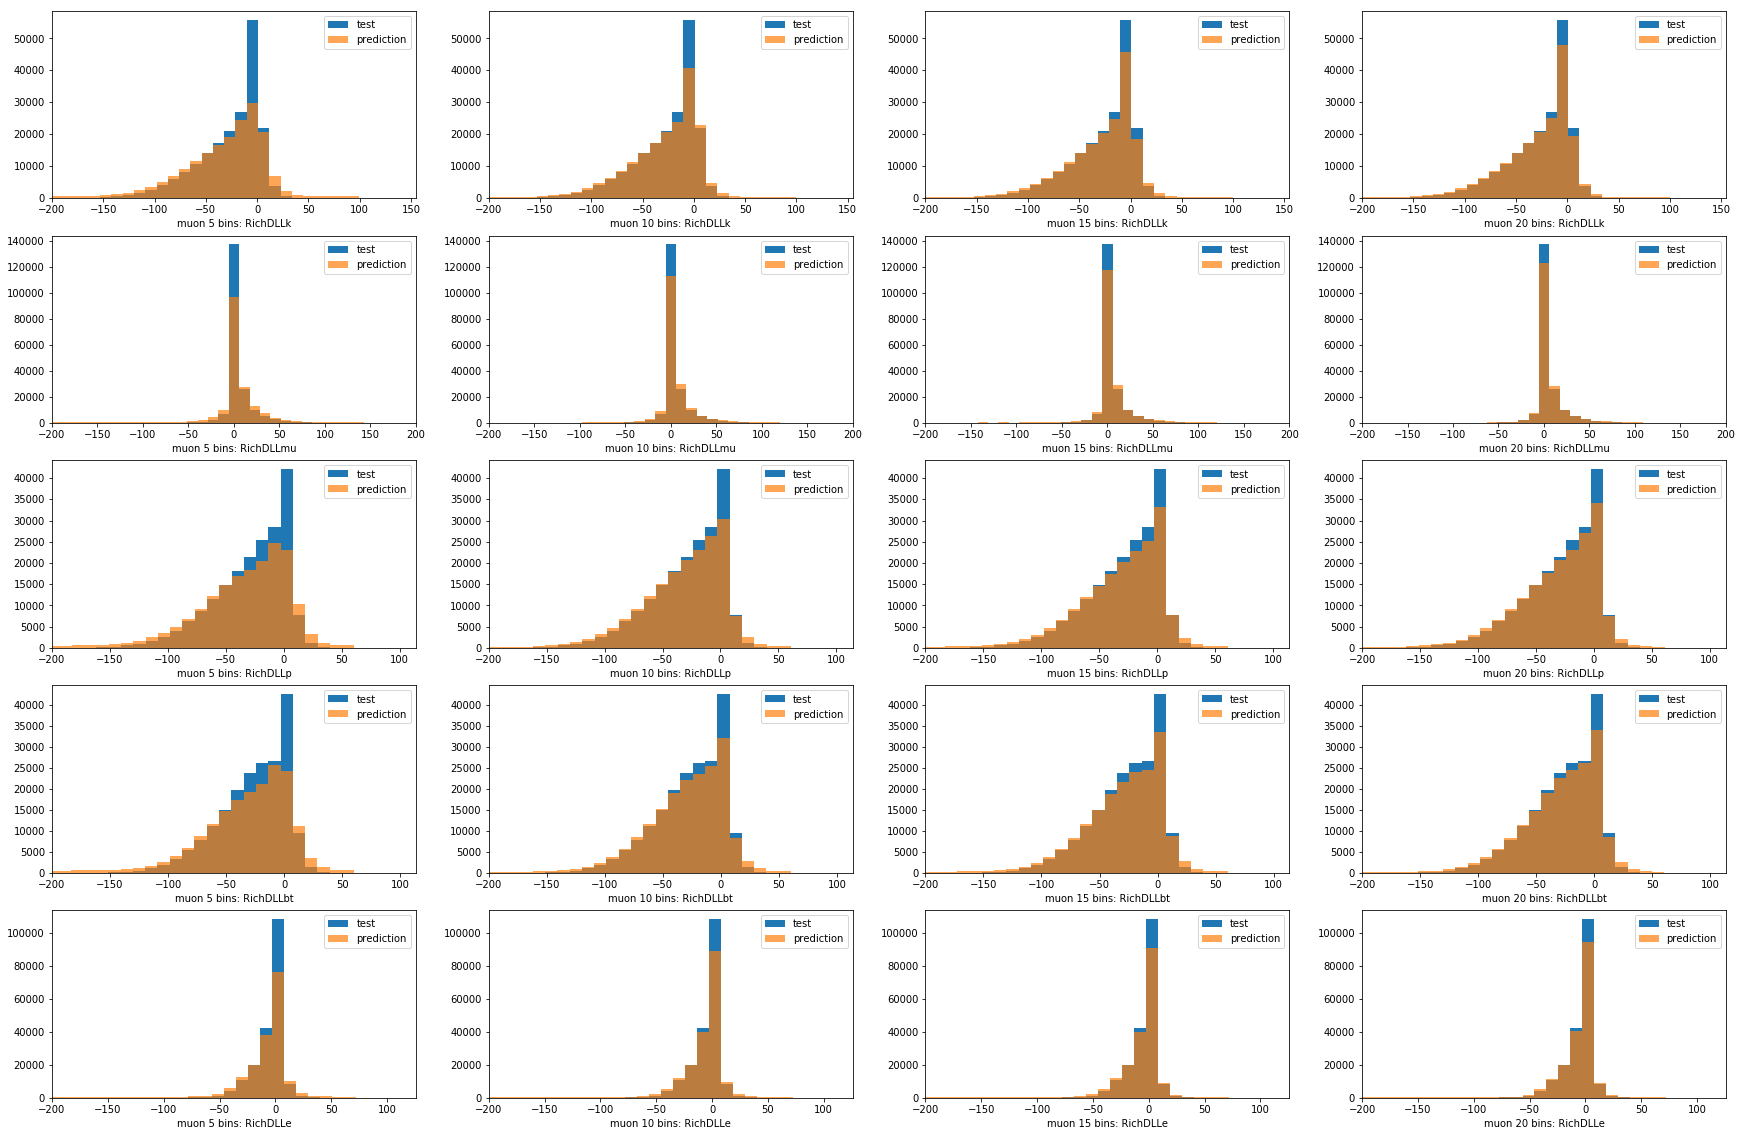

In [115]:
visualise_4_dfs(Y_test['muon'], Y_pred['muon'], Y_test_10['muon'], Y_pred_10['muon'],
                Y_test_15['muon'], Y_pred_15['muon'], Y_test_20['muon'], Y_pred_20['muon'],
                'muon', 'muon 5 bins', 'muon 10 bins', 'muon 15 bins', 'muon 20 bins',
                model_scores, model_scores_10, model_scores_15, model_scores_20)


Mean kaon model scores:
5 bins: 0.29011
10 bins: 0.259576
15 bins: 0.256918
20 bins: 0.236679


/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


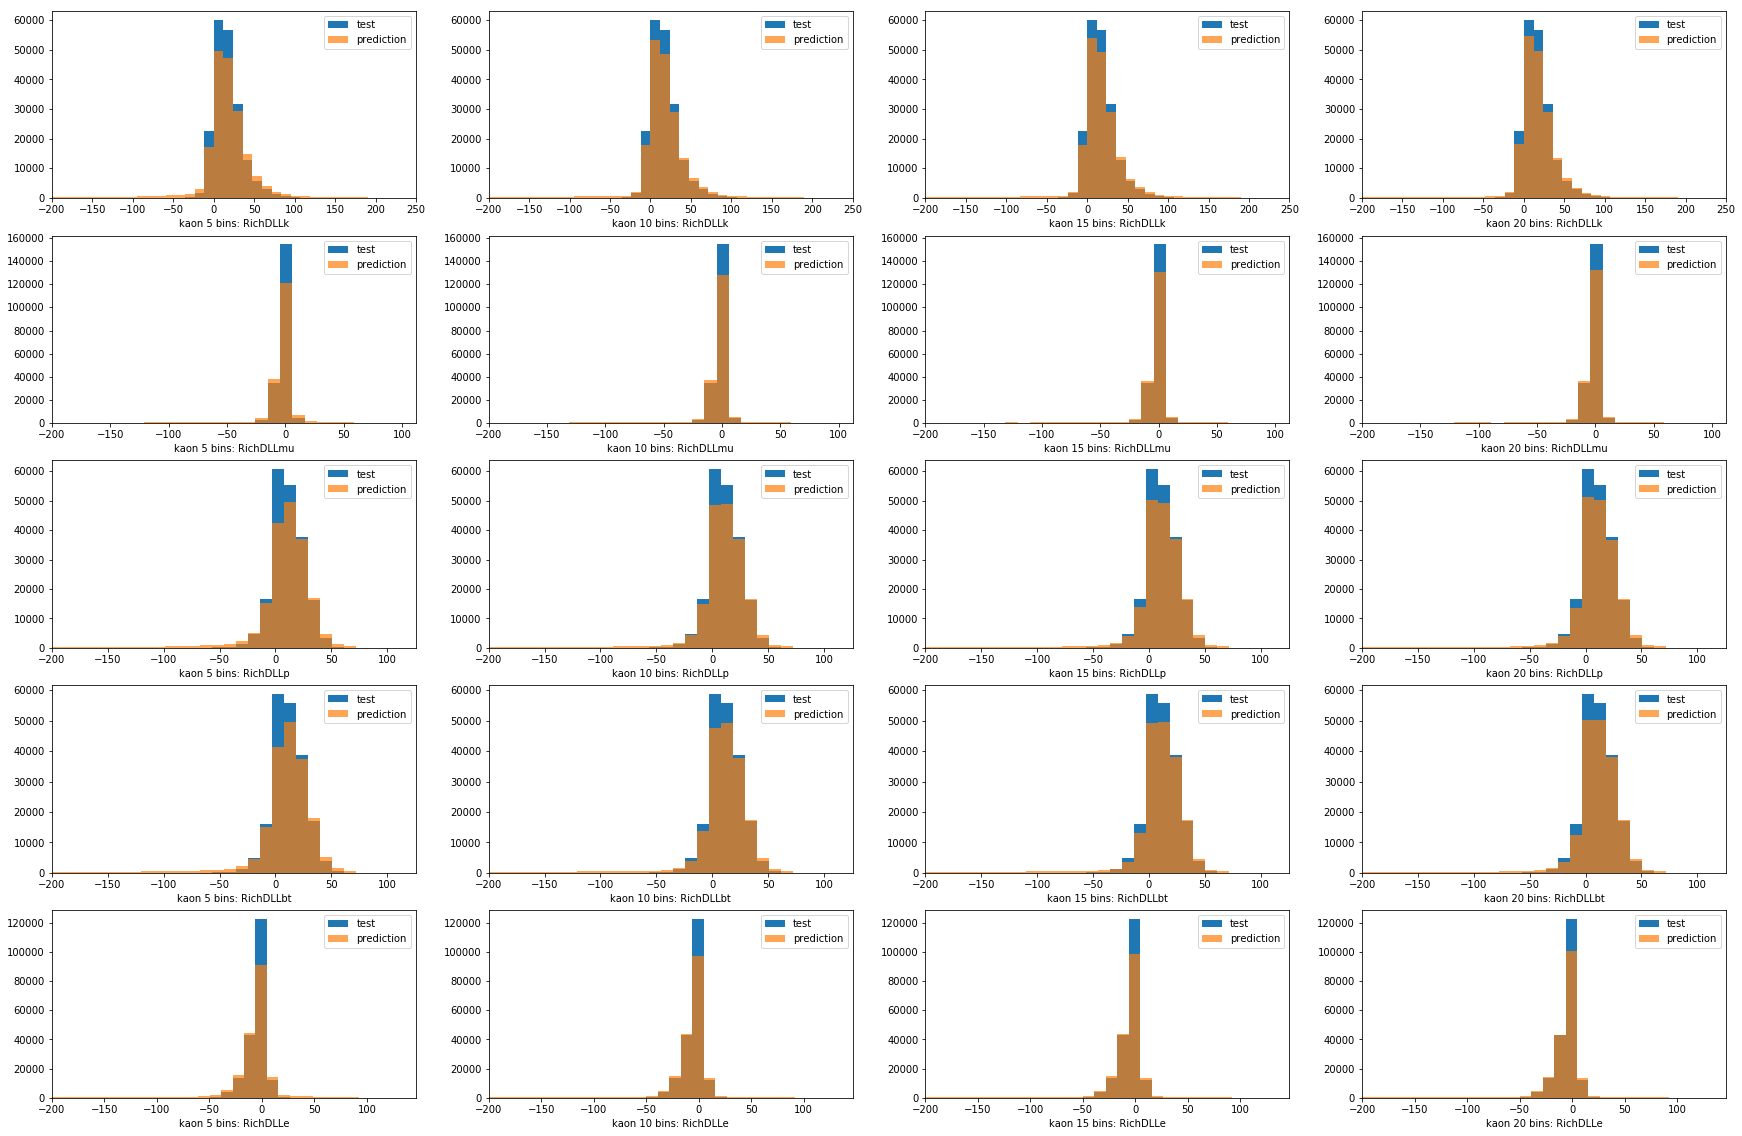

In [116]:
visualise_4_dfs(Y_test['kaon'], Y_pred['kaon'], Y_test_10['kaon'], Y_pred_10['kaon'],
                Y_test_15['kaon'], Y_pred_15['kaon'], Y_test_20['kaon'], Y_pred_20['kaon'],
                'kaon', 'kaon 5 bins', 'kaon 10 bins', 'kaon 15 bins', 'kaon 20 bins',
                model_scores, model_scores_10, model_scores_15, model_scores_20)


Mean pion model scores:
5 bins: 0.298467
10 bins: 0.272503
15 bins: 0.279294
20 bins: 0.254258


/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


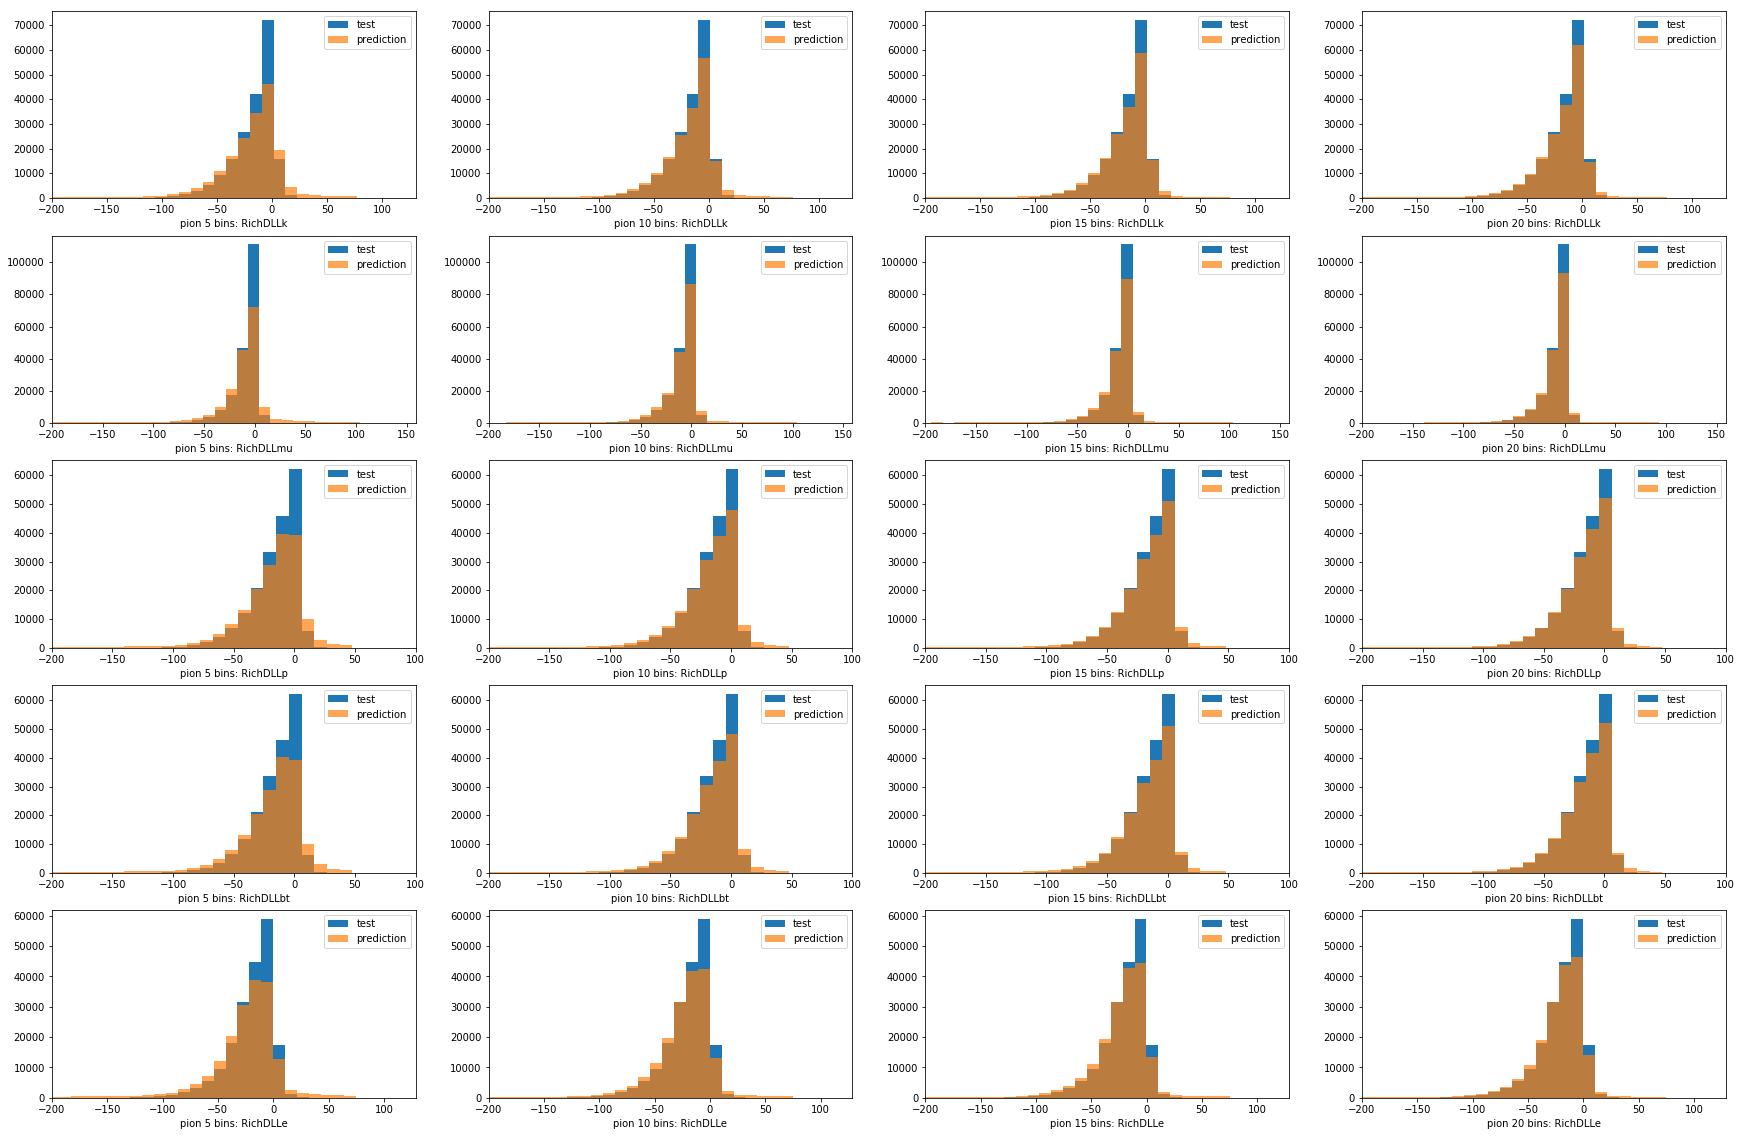

In [117]:
visualise_4_dfs(Y_test['pion'], Y_pred['pion'], Y_test_10['pion'], Y_pred_10['pion'],
                Y_test_15['pion'], Y_pred_15['pion'], Y_test_20['pion'], Y_pred_20['pion'],
                'pion', 'pion 5 bins', 'pion 10 bins', 'pion 15 bins', 'pion 20 bins',
                model_scores, model_scores_10, model_scores_15, model_scores_20)


Mean proton model scores:
5 bins: 0.288059
10 bins: 0.244487
15 bins: 0.261036
20 bins: 0.227304


/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


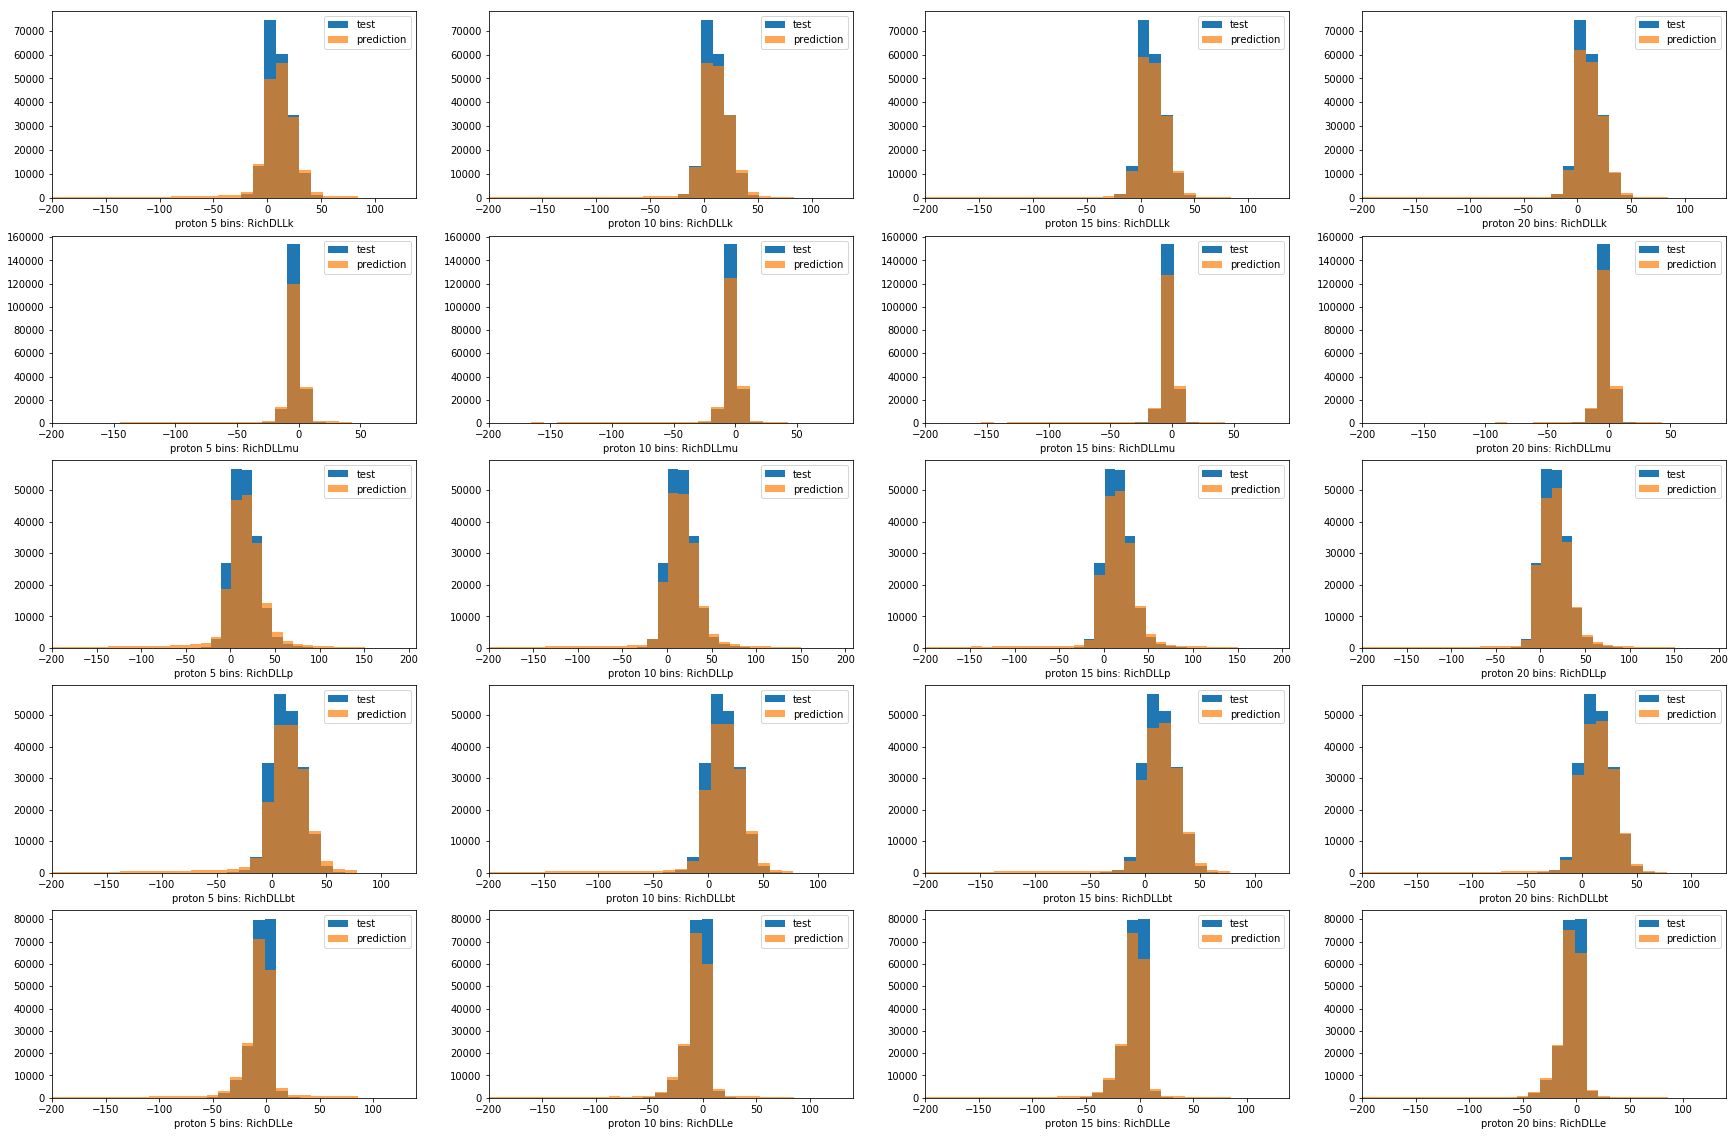

In [118]:
visualise_4_dfs(Y_test['proton'], Y_pred['proton'], Y_test_10['proton'], Y_pred_10['proton'],
                Y_test_15['proton'], Y_pred_15['proton'], Y_test_20['proton'], Y_pred_20['proton'],
                'proton', 'proton 5 bins', 'proton 10 bins', 'proton 15 bins', 'proton 20 bins',
                model_scores, model_scores_10, model_scores_15, model_scores_20)


Mean electron model scores:
5 bins: 0.244219
10 bins: 0.19244
15 bins: 0.18491
20 bins: 0.20759


/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


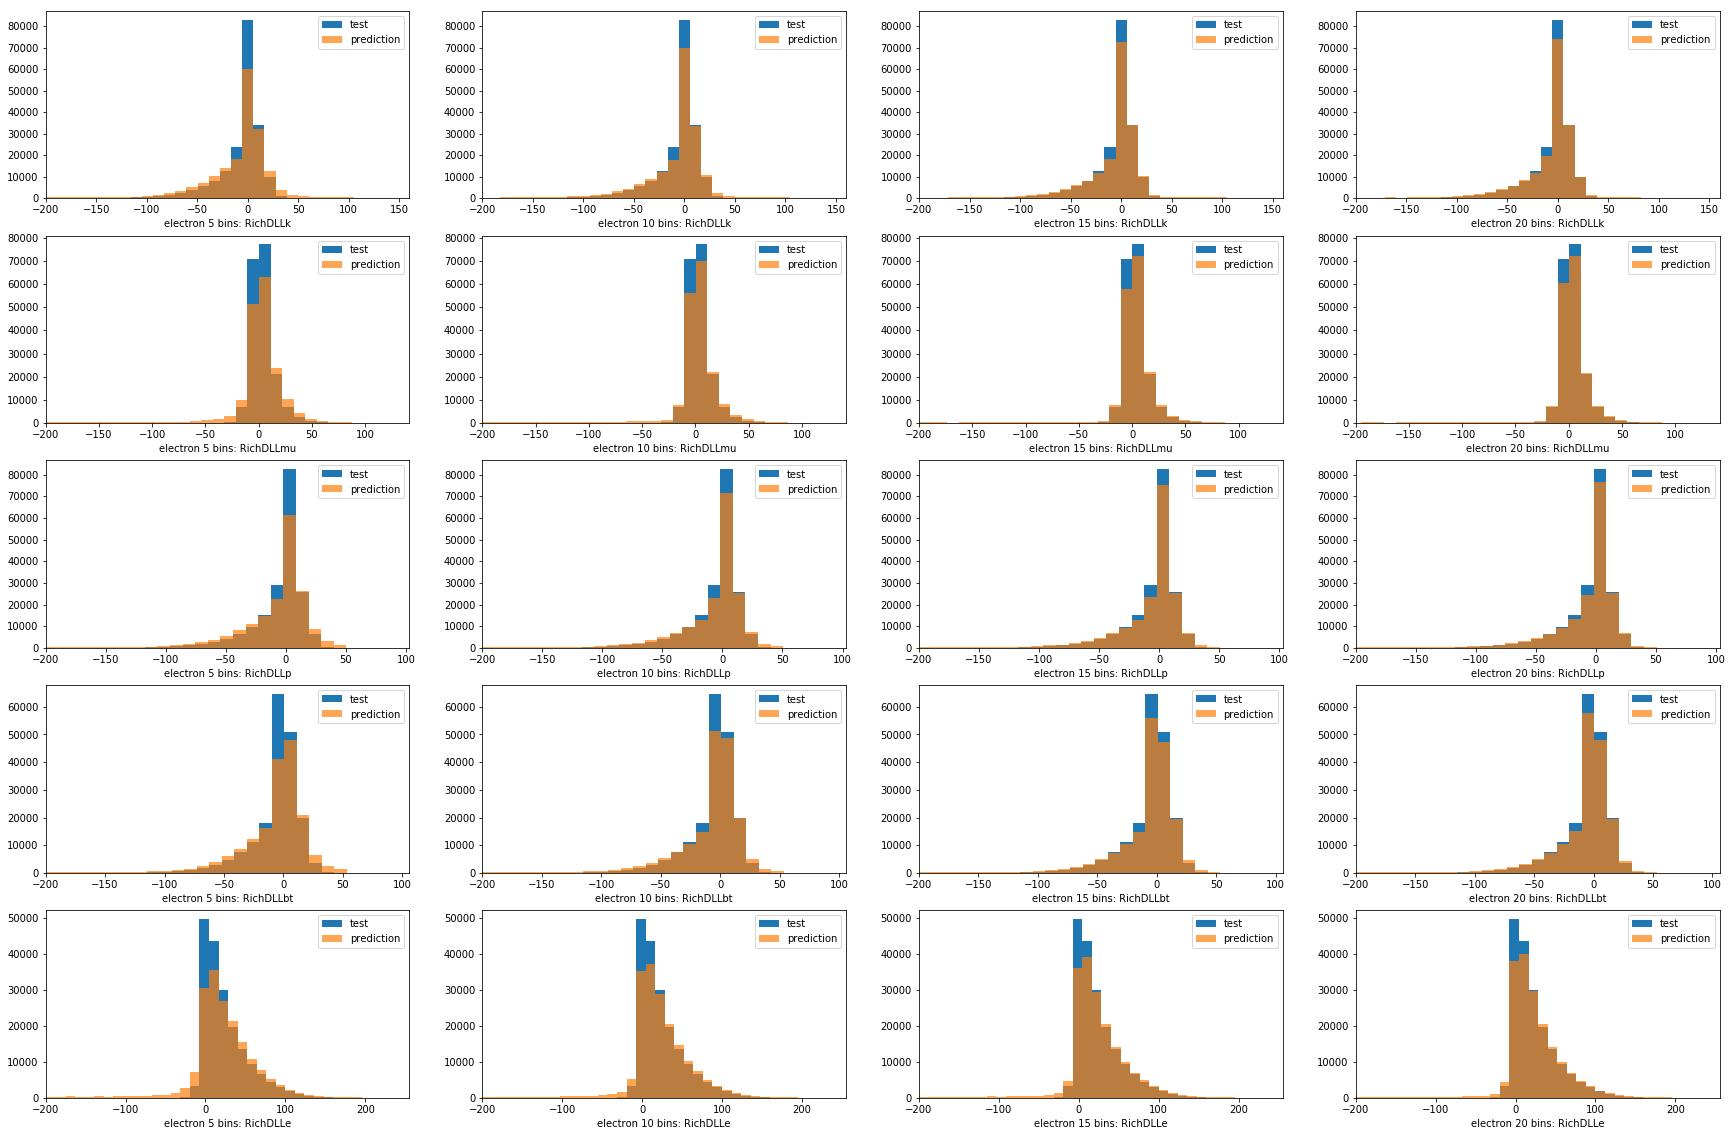

In [119]:
visualise_4_dfs(Y_test['electron'], Y_pred['electron'], Y_test_10['electron'], Y_pred_10['electron'],
                Y_test_15['electron'], Y_pred_15['electron'], Y_test_20['electron'], Y_pred_20['electron'],
                'electron', 'electron 5 bins', 'electron 10 bins', 'electron 15 bins', 'electron 20 bins',
                model_scores, model_scores_10, model_scores_15, model_scores_20)


Mean ghost model scores:
5 bins: 0.321573
10 bins: 0.276278
15 bins: 0.266496
20 bins: 0.267612


/home/paul/.local/lib/python3.5/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


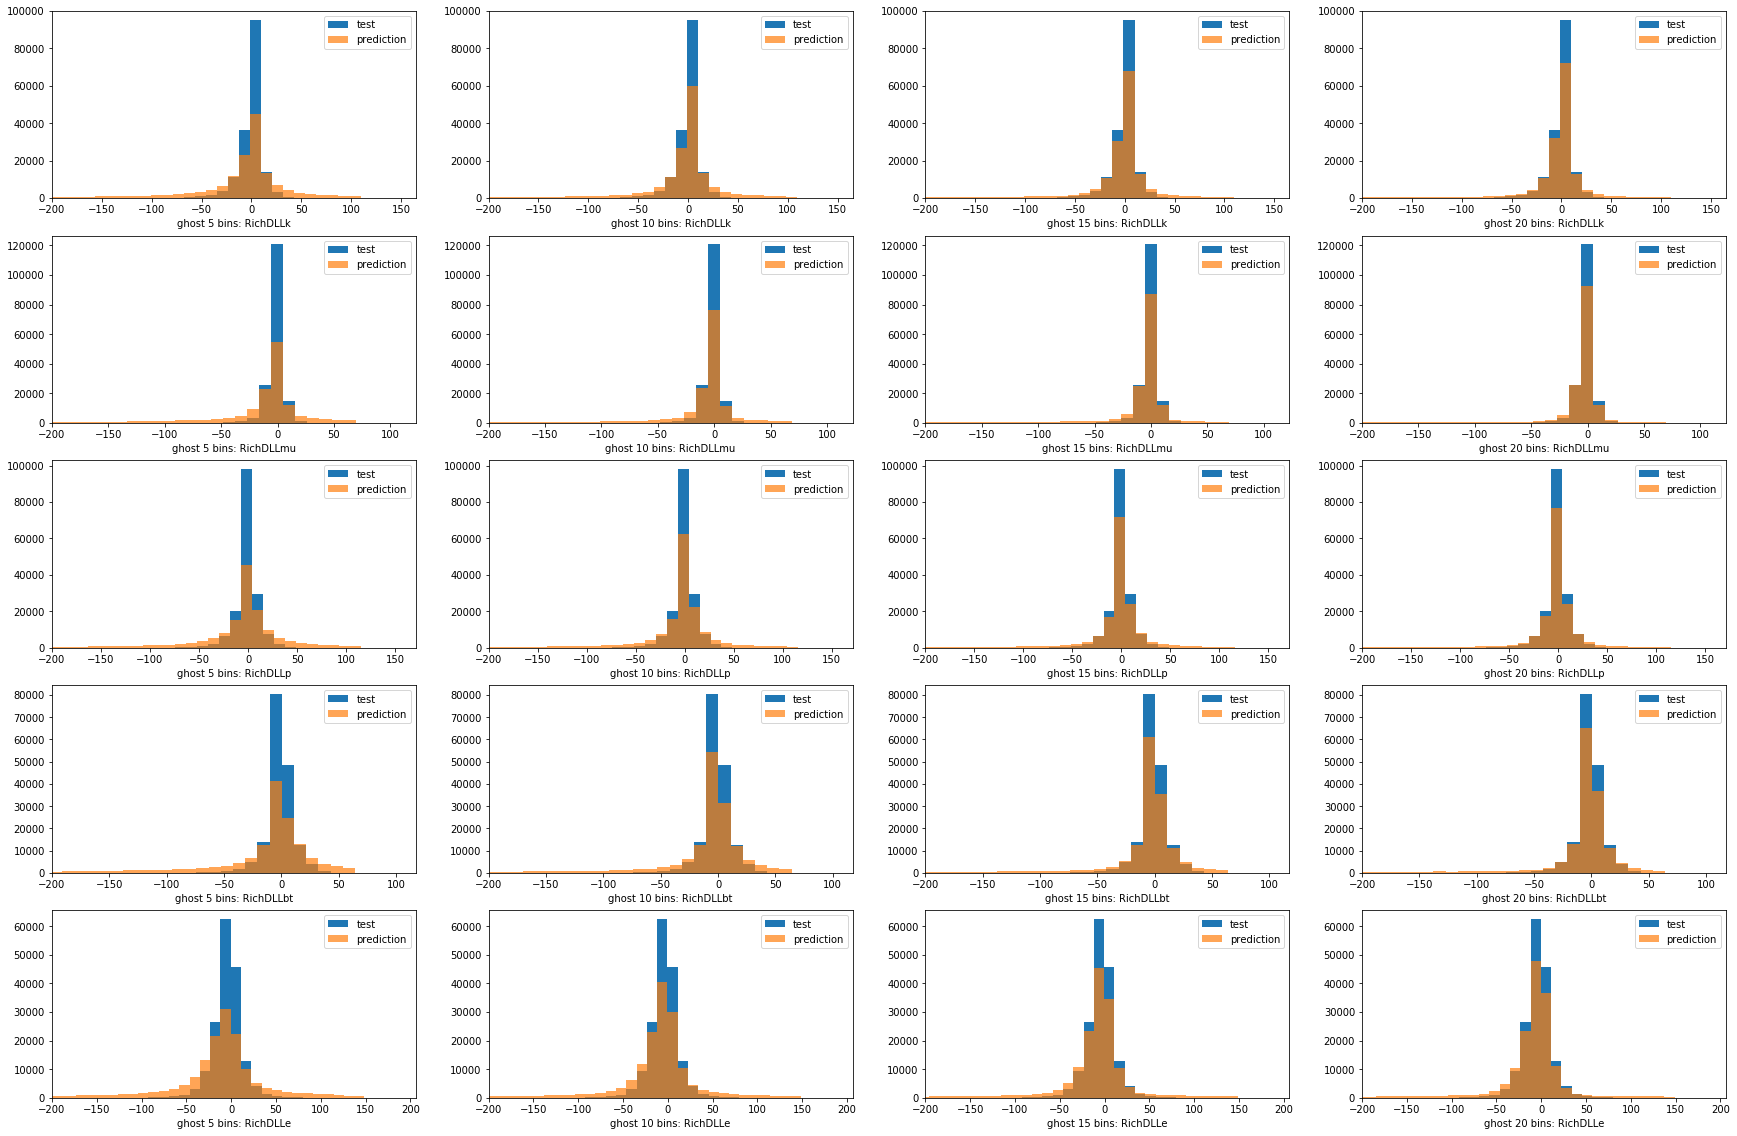

In [120]:
visualise_4_dfs(Y_test['ghost'], Y_pred['ghost'], Y_test_10['ghost'], Y_pred_10['ghost'],
                Y_test_15['ghost'], Y_pred_15['ghost'], Y_test_20['ghost'], Y_pred_20['ghost'],
                'ghost', 'ghost 5 bins', 'ghost 10 bins', 'ghost 15 bins', 'ghost 20 bins',
                model_scores, model_scores_10, model_scores_15, model_scores_20)
